In [1]:
import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
import csv
import networkx as nx
import pickle
from scipy import stats

import sys
sys.path.insert(1, '../')
from utils import *

In [2]:
#dataset = 'hospital'
#dataset = 'high_school'
#dataset = 'conference'
#dataset = 'workplace'
dataset = 'pr_school'

In [3]:
weighted = True

# Load C and obtain r and s:

C is an array of weights, I need to put it in a matrix shape to compute r and s

In [4]:
def obtain_r_s_indices(C,edgelist):
    # put C in dict:
    C_dict = {}
    n = 0
    for edge in edgelist:
        C_dict[tuple(edge)] = C[n]
        C_dict[tuple(edge[::-1])] = C[n+1]
        n += 2
    # verify:
    if list(C_dict.values()) != list(C):
        print('error')
    nb_nodes = max(np.unique(list(C_dict.keys()))) + 1
    # put C_dict in matrix:
    C_mat = np.zeros((nb_nodes,nb_nodes))
    for link in C_dict:
        C_mat[link[0],link[1]] = C_dict[link]

    # receiver index:
    r = C_mat.sum(axis=0) # somma di ogni colonna
    # spreader index:
    s = C_mat.sum(axis=1) # somma di ogni riga

    return r, s

In [5]:
with open('../data/pairwise/' + dataset + '_strength_edgelist_pairwise_sorted.pkl', 'rb') as f:
    edgelist = pickle.load(f)

### Simple

In [6]:
mu = 0.1
if dataset == 'pr_school':
    beta = 0.36
    R0 = 3.0

In [7]:

filename = "../Simple_model/code/results/inf_treeSIR/CL_mean_weighted_%s_beta_%.3f_betaT_0.000_mu_%.2f_init_1.csv"%(dataset,beta,mu)
C = load_C_mean(filename)
# verify:
if 2*len(edgelist) != len(C):
    print('errore')
r_simple, s_simple = obtain_r_s_indices(C,edgelist)


### Simplicial

In [8]:
mu = 0.1

if dataset == 'pr_school':
    beta = 0.07
    betaT = 7

In [9]:
filename = "../Simplicial_model/code/results/inf_treeSIR/CL_mean_weighted_%s_beta_%.3f_betaT_%.3f_mu_%.2f_init_1.csv"%(dataset,beta,betaT,mu)
CL = load_C_mean(filename)
filename = "../Simplicial_model/code/results/inf_treeSIR/CT_mean_weighted_%s_beta_%.3f_betaT_%.3f_mu_%.2f_init_1.csv"%(dataset,beta,betaT,mu)
CT = load_C_mean(filename)
C = CL + CT
# verify:
if 2*len(edgelist) != len(C):
    print('errore')
r_simplicial, s_simplicial = obtain_r_s_indices(C,edgelist)


### Threshold

In [10]:
if dataset == 'pr_school':
    th = 0.1
mu = 0.1

In [11]:

if mu > 0:
    filename = "../Threshold_model/code/results/inf_treeSIR/C_mean_weighted_%s_th_%.2f_mu_%.3f.csv"%(dataset,th,mu)
else:
    filename = "../Threshold_model/code/results/inf_treeSI/C_mean_weighted_%s_th_%.2f.csv"%(dataset,th)

C = load_C_mean(filename)
# verify:
if 2*len(edgelist) != len(C):
    print('errore')
r_thresh, s_thresh = obtain_r_s_indices(C,edgelist)


# Centralities

In [12]:
 G=nx.from_edgelist(edgelist)

In [13]:
nodes = np.sort(list(G.nodes()))

In [14]:
edgelist_shape = []
for link in edgelist:
    edgelist_shape.append((link[0],link[1],edgelist[link]))

In [15]:
W = nx.Graph()  
#G.add_weighted_edges_from([(0, 1, 3.0), (1, 2, 7.5)])
W.add_weighted_edges_from(edgelist_shape)

Weighted betweenness

In [16]:
b_dict = nx.betweenness_centrality(W, weight=True)

In [17]:
b = []
for node in nodes:
    b.append(b_dict[node])

Closeness

In [18]:
c_dict = nx.closeness_centrality(G)

In [19]:
c = []
for node in nodes:
    c.append(c_dict[node])

clustering

In [20]:
cl_dict = nx.clustering(G)

In [21]:
cl = []
for node in nodes:
    cl.append(cl_dict[node])

PageRank

In [22]:
p_dict = nx.pagerank(G, alpha=0.85)

In [23]:
p = []
for node in nodes:
    p.append(p_dict[node])

Degree

In [24]:
k_dict = dict(G.degree())

In [25]:
k = []
for node in nodes:
    k.append(k_dict[node])

Strength

In [26]:
s_dict = dict(W.degree(weight='weight'))

In [27]:
st = []
for node in nodes:
    st.append(s_dict[node])

# Correlations

In [28]:
M = np.empty((6, 6))

M[0,0] = stats.pearsonr(k, s_simple)[0]
M[0,1] = stats.pearsonr(k, r_simple)[0]

M[0,2] = stats.pearsonr(k, s_simplicial)[0]
M[0,3] = stats.pearsonr(k, r_simplicial)[0]

M[0,4] = stats.pearsonr(k, s_thresh)[0]
M[0,5] = stats.pearsonr(k, r_thresh)[0]
#
M[1,0] = stats.pearsonr(st, s_simple)[0]
M[1,1] = stats.pearsonr(st, r_simple)[0]

M[1,2] = stats.pearsonr(st, s_simplicial)[0]
M[1,3] = stats.pearsonr(st, r_simplicial)[0]

M[1,4] = stats.pearsonr(st, s_thresh)[0]
M[1,5] = stats.pearsonr(st, r_thresh)[0]
#
M[2,0] = stats.pearsonr(c, s_simple)[0]
M[2,1] = stats.pearsonr(c, r_simple)[0]

M[2,2] = stats.pearsonr(c, s_simplicial)[0]
M[2,3] = stats.pearsonr(c, r_simplicial)[0]

M[2,4] = stats.pearsonr(c, s_thresh)[0]
M[2,5] = stats.pearsonr(c, r_thresh)[0]
#
M[3,0] = stats.pearsonr(b, s_simple)[0]
M[3,1] = stats.pearsonr(b, r_simple)[0]

M[3,2] = stats.pearsonr(b, s_simplicial)[0]
M[3,3] = stats.pearsonr(b, r_simplicial)[0]

M[3,4] = stats.pearsonr(b, s_thresh)[0]
M[3,5] = stats.pearsonr(b, r_thresh)[0]
#
M[4,0] = stats.pearsonr(p, s_simple)[0]
M[4,1] = stats.pearsonr(p, r_simple)[0]

M[4,2] = stats.pearsonr(p, s_simplicial)[0]
M[4,3] = stats.pearsonr(p, r_simplicial)[0]

M[4,4] = stats.pearsonr(p, s_thresh)[0]
M[4,5] = stats.pearsonr(p, r_thresh)[0]
#
M[5,0] = stats.pearsonr(cl, s_simple)[0]
M[5,1] = stats.pearsonr(cl, r_simple)[0]

M[5,2] = stats.pearsonr(cl, s_simplicial)[0]
M[5,3] = stats.pearsonr(cl, r_simplicial)[0]

M[5,4] = stats.pearsonr(cl, s_thresh)[0]
M[5,5] = stats.pearsonr(cl, r_thresh)[0]

M

array([[ 0.84953203,  0.59672084,  0.81217596,  0.65985609,  0.7488338 ,
        -0.27220266],
       [ 0.9266655 ,  0.68964676,  0.93772805,  0.77685546,  0.58464543,
        -0.39387511],
       [ 0.83810824,  0.60948206,  0.79818763,  0.6629844 ,  0.73579987,
        -0.25750065],
       [ 0.81067777,  0.46757998,  0.76541464,  0.53005673,  0.7393037 ,
        -0.26187445],
       [ 0.85225207,  0.58733694,  0.81148669,  0.64858805,  0.75356966,
        -0.27322213],
       [-0.58751383, -0.45223673, -0.50572962, -0.42406625, -0.51696304,
         0.11500275]])

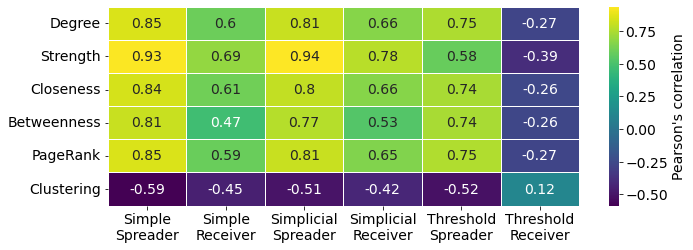

In [29]:
plt.rcParams.update({'font.size': 14})

maxValue = max([max(M[n]) for n in range(len(M))])
minValue = min([min(M[n]) for n in range(len(M))])

plt.figure(figsize=(10,3.7))
sns.heatmap(M,
            xticklabels=['Simple\nSpreader', 'Simple\nReceiver','Simplicial\nSpreader', 'Simplicial\nReceiver','Threshold\nSpreader', 'Threshold\nReceiver'],
            yticklabels=['Degree', 'Strength','Closeness','Betweenness','PageRank','Clustering'], 
            annot=True, 
            vmin=minValue, 
            vmax=maxValue,
            linewidths=0.8,
            cmap="viridis",
            cbar_kws={'label': 'Pearson\'s correlation'})
plt.tight_layout()

figname = 'figs/Centrality_r_s_corr_%s.pdf'%(dataset)
plt.savefig(figname)
plt.show()

